In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mxnet as mx
import numpy as np
import pandas as pd

import logging
logging.getLogger().setLevel(logging.DEBUG)

In [441]:
meta = pd.read_csv('data/TGGATES/cel/rat/meta.scaled.csv',index_col=0)

In [442]:
meta

,ORGAN,ORGAN_NO,COMPOUND_NAME,COMPOUND_NO,DOSE,SCALED.DOSE,SACRI_PERIOD,HOURS,SCALED.HOURS
combnLiver.acarbose.0.3 hr,Liver,1,acarbose,116,0,0.0,3 hr,3,0.125
combnLiver.acarbose.0.6 hr,Liver,1,acarbose,116,0,0.0,6 hr,6,0.250
combnLiver.acarbose.0.9 hr,Liver,1,acarbose,116,0,0.0,9 hr,9,0.375
combnLiver.acarbose.100.24 hr,Liver,1,acarbose,116,100,0.1,24 hr,24,1.000
combnLiver.acarbose.100.3 hr,Liver,1,acarbose,116,100,0.1,3 hr,3,0.125
combnLiver.acarbose.100.6 hr,Liver,1,acarbose,116,100,0.1,6 hr,6,0.250
combnLiver.acarbose.100.9 hr,Liver,1,acarbose,116,100,0.1,9 hr,9,0.375
combnLiver.acarbose.1000.24 hr,Liver,1,acarbose,116,1000,1.0,24 hr,24,1.000
combnLiver.acarbose.1000.3 hr,Liver,1,acarbose,116,1000,1.0,3 hr,3,0.125
combnLiver.acarbose.1000.6 hr,Liver,1,acarbose,116,1000,1.0,6 hr,6,0.250


In [7]:
biochem = pd.read_csv('data/TGGATES/cel/rat/biochem.scaled.csv',index_col=0)

In [11]:
expr = pd.read_csv('data/TGGATES/cel/rat/exprs.scaled.csv',index_col=0)

In [12]:
biochem

,ALP.IU.L.,TC.mg.dL.,TG.mg.dL.,PL.mg.dL.,TBIL.mg.dL.,DBIL.mg.dL.,GLC.mg.dL.,BUN.mg.dL.,CRE.mg.dL.,Na.meq.L.,...,Cl.meq.L.,Ca.mg.dL.,IP.mg.dL.,TP.g.dL.,RALB.g.dL.,A.G,AST.IU.L.,ALT.IU.L.,LDH.IU.L.,GTP.IU.L.
combnLiver.acarbose.0.3 hr,0.218111,1.570692,4.221556e-01,0.658297,-1.874542e+00,-2.400000e+00,-1.146931,-1.087857e+00,2.683282e+00,-1.851799,...,-5.139033,1.011255e+00,0.044898,7.548701e-15,6.636015e-01,0.838110,1.973392e+00,1.619659e+00,2.439228e+00,4.548588e+00
combnLiver.acarbose.0.6 hr,-0.263716,1.138752,3.837779e-01,0.429324,-4.686356e+00,-3.000000e+00,0.247985,-2.393284e+00,8.944272e-01,-2.962878,...,-3.936920,2.528137e-01,0.269385,-4.786616e-01,-1.720676e-15,0.515760,6.933539e-01,6.478635e-01,1.816447e+00,1.049355e-14
combnLiver.acarbose.0.9 hr,0.027760,-0.235604,-1.407185e-01,-0.715540,1.124725e+00,-3.800000e+00,-1.146931,-3.916284e+00,2.683282e+00,-3.333238,...,-3.936920,-1.264069e+00,-0.134693,-4.786616e-01,-9.954023e-01,-0.773640,1.066698e-01,-3.239318e-01,7.914517e-01,1.819435e+00
combnLiver.acarbose.100.24 hr,1.138144,1.099484,-6.396298e-02,0.629675,-7.498170e-01,-8.000000e-01,-0.836949,-1.305428e+00,1.788854e+00,-1.259223,...,-1.893328,3.792206e-01,0.448976,9.573232e-01,-3.318008e-01,-1.418341,9.600284e-01,1.295727e-01,1.946193e-01,1.819435e+00
combnLiver.acarbose.100.3 hr,1.265045,1.020950,3.057430e+00,2.490080,-1.312180e+00,-2.000000e+00,-1.456912,1.305428e+00,5.366563e+00,-0.740720,...,-4.237449,1.390475e+00,-2.693853,2.632639e+00,5.972414e+00,5.673362,5.866841e-01,1.943591e+00,1.621827e+00,2.729153e+00
combnLiver.acarbose.100.6 hr,0.267682,-0.039267,6.524224e-01,-0.629675,-4.686356e+00,-3.000000e+00,-1.673899,-8.702853e-01,8.944272e-01,-2.592519,...,-5.740090,6.320343e-01,2.065287,1.196654e+00,-6.636015e-01,-2.063041,3.146760e+00,2.202736e+00,1.790497e+00,2.729153e+00
combnLiver.acarbose.100.9 hr,1.157972,0.667544,3.837779e-02,0.658297,1.092373e-14,-4.400000e+00,0.371978,-2.393284e+00,1.788854e+00,-2.222159,...,-2.734807,-8.848480e-01,0.089795,1.196654e+00,6.636015e-01,-0.128940,5.333491e-01,-2.591454e-01,2.504101e+00,9.097177e-01
combnLiver.acarbose.1000.24 hr,0.876410,0.510475,2.686445e+00,0.944513,-2.436905e+00,-1.800000e+00,0.495970,1.440169e-15,3.577709e+00,-1.111079,...,-2.434279,3.792206e-01,-2.693853,1.435985e+00,5.308812e+00,6.962763,-2.258414e-15,9.070090e-01,9.211979e-01,9.097177e-01
combnLiver.acarbose.1000.3 hr,-0.245871,1.649227,3.581927e-01,0.944513,-1.499634e+00,8.000000e-01,-0.960942,-2.175713e+00,2.683282e+00,-2.222159,...,-2.584543,7.584412e-01,0.314283,9.573232e-01,1.327203e+00,0.676935,5.333491e-02,-5.830772e-01,1.193665e+00,9.097177e-01
combnLiver.acarbose.1000.6 hr,1.455396,1.295821,1.944475e+00,1.087621,-2.061997e+00,2.600000e+00,-1.115933,2.175713e-01,1.788854e+00,-1.481439,...,-3.636392,1.390475e+00,0.314283,2.153977e+00,4.977011e+00,5.028662,3.466769e+00,5.118122e+00,3.074985e+00,9.747218e-15


In [13]:
expr

,combnLiver.acarbose.0.3 hr,combnLiver.acarbose.0.6 hr,combnLiver.acarbose.0.9 hr,combnLiver.acarbose.100.24 hr,combnLiver.acarbose.100.3 hr,combnLiver.acarbose.100.6 hr,combnLiver.acarbose.100.9 hr,combnLiver.acarbose.1000.24 hr,combnLiver.acarbose.1000.3 hr,combnLiver.acarbose.1000.6 hr,...,combnLiver.acetaminophen.1000.6 hr,combnLiver.acetaminophen.1000.9 hr,combnLiver.acetaminophen.300.24 hr,combnLiver.acetaminophen.300.3 hr,combnLiver.acetaminophen.300.6 hr,combnLiver.acetaminophen.300.9 hr,combnLiver.acetaminophen.600.24 hr,combnLiver.acetaminophen.600.3 hr,combnLiver.acetaminophen.600.6 hr,combnLiver.acetaminophen.600.9 hr
1367452_at,-0.035287,-0.041299,-0.167256,-0.212408,-0.226222,-0.311368,-0.056909,-0.506429,-0.747903,-0.712651,...,-0.255173,0.224764,-0.379264,-0.479425,-0.468899,-0.525343,-0.305520,-0.839570,-0.449938,-0.295300
1367453_at,0.012052,0.051792,-0.129647,-0.110880,-0.092204,-0.164229,-0.099524,-0.363157,-0.290610,-0.259100,...,0.374560,0.694910,-0.085355,0.009282,0.012322,-0.130496,-0.617137,-0.320490,-0.448242,-0.489415
1367454_at,0.165118,0.215264,0.341078,-0.321999,-0.232505,-0.317750,-0.297176,-0.246771,-0.083931,-0.070515,...,0.028990,0.035235,-0.096427,0.027919,-0.057829,-0.179626,-0.269520,-0.162450,-0.382384,-0.691650
1367455_at,0.326126,0.431341,0.195370,0.226484,0.076904,-0.018948,0.005808,0.067336,0.081584,0.178852,...,0.286112,4.933094,0.108018,0.209754,0.182318,0.151307,-0.332435,0.099753,0.127047,-0.263228
1367456_at,-0.048319,-0.103770,-0.038676,-0.086420,-0.279252,-0.384084,-0.169435,-0.339992,-0.380059,-0.434414,...,-0.134277,0.372773,0.036943,-0.042448,-0.078199,-0.018278,-0.078841,-0.016792,0.160607,0.092247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,0.277984,0.179304,0.189871,0.043468,-0.120750,-0.555951,-0.510488,0.121512,0.010598,0.140244,...,0.107991,-0.190869,0.678560,0.550832,0.627435,0.554955,0.232555,0.202616,3.287200,0.261277
AFFX-ThrX-M_at,0.228002,0.100136,-0.011540,0.076620,-0.056965,-0.521058,-0.389947,0.236706,0.224131,0.181952,...,-0.162762,-0.465968,0.413904,0.255096,0.407928,0.355315,0.198873,0.165765,0.393514,0.204108
AFFX-TrpnX-3_at,0.260445,-0.152657,-0.209792,-0.558054,-0.543949,-1.612829,-1.219816,-5.736913,-0.502068,-0.526238,...,-0.525539,-0.757636,-0.071338,-0.107060,-0.105956,-0.224362,-0.869129,-1.106080,-0.911465,-0.797772
AFFX-TrpnX-5_at,0.110285,0.018297,0.086410,-0.488260,-0.423011,-1.293374,-1.169479,-0.807321,-0.663225,-0.569887,...,0.018189,-0.370773,0.058949,0.019512,0.181069,-0.121158,-0.588542,-0.586845,-0.311570,-0.422129


In [304]:
class simIter(mx.io.DataIter):
    def __init__(self, coefs, labels, data_names, data_shapes,
                 label_names, label_shapes, batch_size=10, num_batches=10, shuffle_labels=False, 
                 coefs_multivariate=False, labels_multivariate=False):
        assert coefs.shape[0]==labels.shape[0], 'coefs and labels must have same first dimension'
        self.coefs = coefs
        self.labels = labels
        self._provide_data = list(zip(data_names, data_shapes))
        self._provide_label = list(zip(label_names, label_shapes))
        self.batch_size = batch_size
        self.num_batches = num_batches
        self.cur_batch = 0
        self.shuffle_labels = shuffle_labels
        self.coefs_multivariate = coefs_multivariate
        if self.coefs_multivariate:
            self.coefs_cov = np.cov(coefs.T)
        else:
            self.coefs_cov = None
        self.labels_multivariate = labels_multivariate
        if self.labels_multivariate:
            self.labels_cov = np.cov(labels.T)
        else:
            self.labels_cov = None

    def __iter__(self):
        return self

    def reset(self):
        self.cur_batch = 0
        np.random.seed(123)

    def __next__(self):
        return self.next()

    @property
    def provide_data(self):
        return self._provide_data

    @property
    def provide_label(self):
        return self._provide_label

    def next(self):
        if self.cur_batch < self.num_batches:
            self.cur_batch += 1
            idx = np.random.choice(np.arange(self.coefs.shape[0]),self.batch_size)
            if self.coefs_multivariate:
                sim = mx.nd.array(
                    np.array([
                        np.random.multivariate_normal(
                            self.coefs[_,:],
                            self.coefs_cov
                        ) for _ in idx
                    ])
                )
            else:
                sim = mx.nd.array(np.random.normal(self.coefs[idx,:],1))
            if self.labels_multivariate:
                lab = mx.nd.array(
                    np.array([
                        np.random.multivariate_normal(
                            self.labels[_,:],
                            self.labels_cov
                        ) for _ in idx
                    ])
                )
            else:
                lab = mx.nd.array(np.random.normal(self.labels[idx,:],1))
            if self.shuffle_labels:
                lab = mx.random.shuffle(lab)
            return mx.io.DataBatch([sim], [lab])
        else:
            raise StopIteration

In [305]:
batch_size = 1
num_epoch = 10

testiter = simIter(
    biochem.values, 
    biochem.values, 
    ['biochem'], 
    [(batch_size,biochem.shape[1])],
    ['biochem_approx'], 
    [(batch_size,biochem.shape[1])], 
    batch_size=batch_size,
    num_batches=num_epoch,
    coefs_multivariate=True,
    labels_multivariate=True
)

In [324]:
batch_size = 10
num_epoch = 10

testiter = simIter(
    expr.values.T, 
    biochem.values, 
    ['expr'], 
    [(batch_size,expr.shape[1])],
    ['biochem_approx'], 
    [(batch_size,biochem.shape[1])], 
    batch_size=batch_size,
    num_batches=num_epoch,
    coefs_multivariate=False,
    labels_multivariate=True
)

In [325]:
expr.shape

(31099, 47)

In [326]:
biochem.shape

(47, 21)

In [327]:
testiter.next().data[0].shape

(10, 31099)

In [328]:
testiter.next().label[0].shape

(10, 21)

In [ ]:
biochem_var = mx.sym.Variable('biochem')

PCAin  = mx.sym.FullyConnected(data=biochem_var, name='PCAin', num_hidden = 2)
PCAout  = mx.sym.FullyConnected(data=PCAin, name='PCAout', num_hidden = biochem.shape[1])

biochem_approx = mx.symbol.Variable('biochem_approx')
linReg = mx.sym.LinearRegressionOutput(data=PCAout, label=biochem_approx, name="linReg")

DEBUG:graphviz.backend:run ['dot', '-Tsvg']


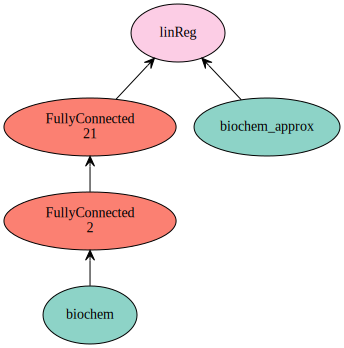

In [346]:
model = mx.mod.Module(
    symbol = linReg ,
    data_names=['biochem'],
    label_names = ['biochem_approx']
)
mx.viz.plot_network(symbol=linReg, node_attrs={"shape":"oval","fixedsize":"false"})

In [347]:
batch_size = 10
num_epoch = 100
rseed = 123

In [ ]:
np.random.seed(rseed)
mx.random.seed(rseed)

model.bind(
    data_shapes=[('biochem', (batch_size,biochem.shape[1]))], 
    label_shapes=[('biochem_approx', (batch_size,biochem.shape[1]))]
)

model.fit(
    simIter(
        biochem.values, 
        biochem.values, 
        ['biochem'], 
        [(batch_size,biochem.shape[1])],
        ['biochem_approx'], 
        [(batch_size,biochem.shape[1])], 
        num_batches=num_epoch,
        batch_size=batch_size,
        coefs_multivariate=True,
        labels_multivariate=True
    ),
    optimizer_params={
        'learning_rate':0.01, 
        'momentum': 0.9
    },
    num_epoch=num_epoch,
    eval_metric='mse'
)

In [316]:
pcorr = model.score(
    mx.io.NDArrayIter(
        biochem.values,
        biochem.values,
        batch_size=batch_size, 
        shuffle=False
    ), 
    mx.metric.PearsonCorrelation()
)
print("Achieved {0:.3f} training PearsonCorrelation".format(pcorr[0][1]))

Achieved 0.856 training PearsonCorrelation


In [364]:
expr_var = mx.sym.Variable('expr')

PCAin  = mx.sym.FullyConnected(data=expr_var, name='PCAin', num_hidden = 2)
PCAout  = mx.sym.FullyConnected(data=PCAin, name='PCAout', num_hidden = biochem.shape[1])

biochem_approx = mx.symbol.Variable('biochem_approx')
linReg = mx.sym.LinearRegressionOutput(data=PCAout, label=biochem_approx, name="linReg")

DEBUG:graphviz.backend:run ['dot', '-Tsvg']


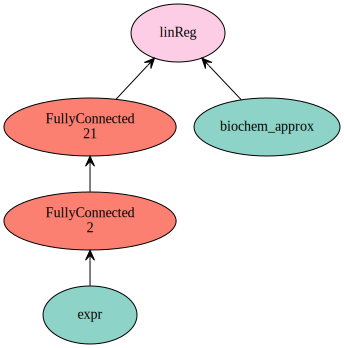

In [365]:
model = mx.mod.Module(
    symbol = linReg ,
    data_names=['expr'],
    label_names = ['biochem_approx']
)
mx.viz.plot_network(symbol=linReg, node_attrs={"shape":"oval","fixedsize":"false"})

In [366]:
np.random.seed(rseed)
mx.random.seed(rseed)

model.bind(
    data_shapes=[('expr', (batch_size,expr.shape[0]))], 
    label_shapes=[('biochem_approx', (batch_size,biochem.shape[1]))]
)

model.fit(
    simIter(
        expr.values.T, 
        biochem.values, 
        ['expr'], 
        [(batch_size,expr.shape[0])],
        ['biochem_approx'], 
        [(batch_size,biochem.shape[1])], 
        num_batches=num_epoch,
        batch_size=batch_size,
        coefs_multivariate=False,
        labels_multivariate=True
    ),
    optimizer_params={
        'learning_rate':0.0001, 
        'momentum': 0.9
    },
    num_epoch=num_epoch,
    eval_metric='mse'
)

INFO:root:Epoch[0] Train-mse=15.982194
INFO:root:Epoch[0] Time cost=2.525
INFO:root:Epoch[1] Train-mse=9.935195
INFO:root:Epoch[1] Time cost=2.389
INFO:root:Epoch[2] Train-mse=8.964648
INFO:root:Epoch[2] Time cost=2.375
INFO:root:Epoch[3] Train-mse=7.629952
INFO:root:Epoch[3] Time cost=3.356
INFO:root:Epoch[4] Train-mse=6.888950
INFO:root:Epoch[4] Time cost=3.883
INFO:root:Epoch[5] Train-mse=6.381714
INFO:root:Epoch[5] Time cost=2.488
INFO:root:Epoch[6] Train-mse=5.919231
INFO:root:Epoch[6] Time cost=3.264
INFO:root:Epoch[7] Train-mse=5.430477
INFO:root:Epoch[7] Time cost=2.519
INFO:root:Epoch[8] Train-mse=4.903998
INFO:root:Epoch[8] Time cost=2.523
INFO:root:Epoch[9] Train-mse=4.364874
INFO:root:Epoch[9] Time cost=2.237
INFO:root:Epoch[10] Train-mse=3.867095
INFO:root:Epoch[10] Time cost=2.347
INFO:root:Epoch[11] Train-mse=3.467876
INFO:root:Epoch[11] Time cost=2.555
INFO:root:Epoch[12] Train-mse=3.191504
INFO:root:Epoch[12] Time cost=2.483
INFO:root:Epoch[13] Train-mse=3.020638
INFO:

In [367]:
pcorr = model.score(
    mx.io.NDArrayIter(
        expr.values.T,
        biochem.values,
        batch_size=expr.shape[1], 
        shuffle=False
    ), 
    mx.metric.PearsonCorrelation()
)
print("Achieved {0:.3f} training PearsonCorrelation".format(pcorr[0][1]))

Achieved 0.924 training PearsonCorrelation


In [368]:
pca_extract = PCAin.eval(
    ctx=mx.cpu(),
    biochem=mx.nd.array(biochem.values),
    **model.get_params()[0]
)[0].asnumpy()

ValueError: key `expr` is missing in `args`

In [377]:
pca_extract_orig = PCAin.eval(
    ctx=mx.cpu(),
    expr=mx.nd.array(expr.values.T),
    **model.get_params()[0]
)[0].asnumpy()

In [385]:
pca_extract = PCAin.eval(
    ctx=mx.cpu(),
    expr=simIter(
        expr.values.T, 
        biochem.values, 
        ['expr'], 
        [(batch_size,expr.shape[1])],
        ['biochem_approx'], 
        [(batch_size,biochem.shape[1])], 
        batch_size=10000,
        num_batches=1,
        coefs_multivariate=False,
        labels_multivariate=False
    ).next().data[0],
    **model.get_params()[0]
)[0].asnumpy()

In [443]:
dat = pd.DataFrame(meta)

In [444]:
dat['PC1'] = pd.Series(pca_extract_orig[:,0], index=biochem.index)
dat['PC2'] = pd.Series(pca_extract_orig[:,1], index=biochem.index)

In [445]:
dat.head()

,ORGAN,ORGAN_NO,COMPOUND_NAME,COMPOUND_NO,DOSE,SCALED.DOSE,SACRI_PERIOD,HOURS,SCALED.HOURS,PC1,PC2
combnLiver.acarbose.0.3 hr,Liver,1,acarbose,116,0,0.0,3 hr,3,0.125,-2.001995,5.656114
combnLiver.acarbose.0.6 hr,Liver,1,acarbose,116,0,0.0,6 hr,6,0.250,-3.886790,6.811240
combnLiver.acarbose.0.9 hr,Liver,1,acarbose,116,0,0.0,9 hr,9,0.375,-0.131715,3.532571
combnLiver.acarbose.100.24 hr,Liver,1,acarbose,116,100,0.1,24 hr,24,1.000,-3.611302,3.324368
combnLiver.acarbose.100.3 hr,Liver,1,acarbose,116,100,0.1,3 hr,3,0.125,9.557297,7.213225


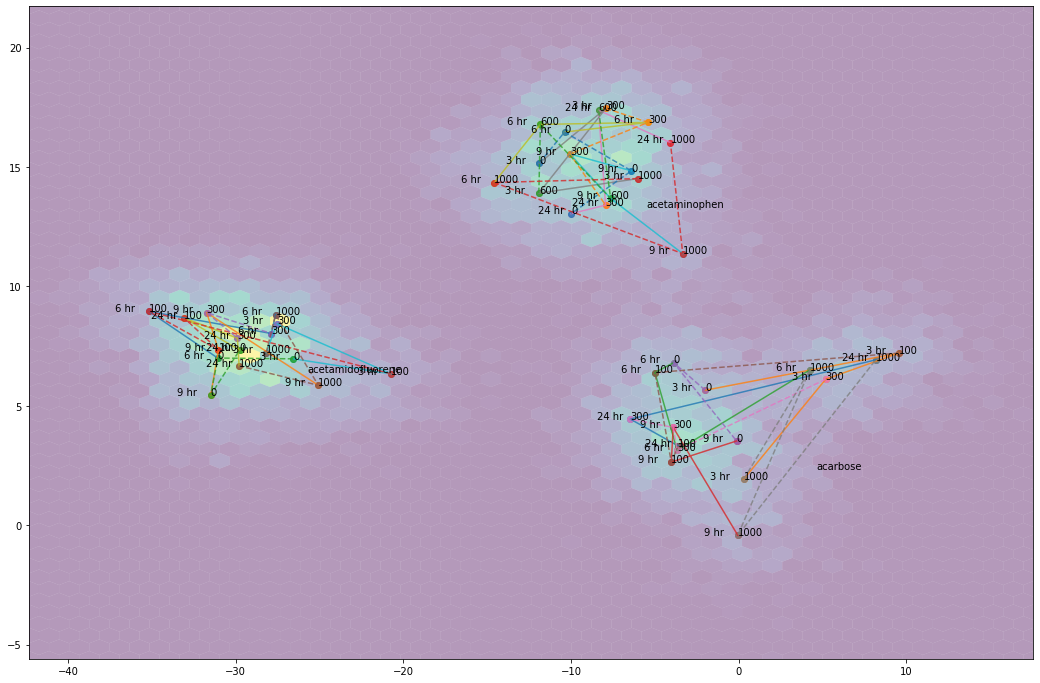

In [446]:
plt.figure(figsize=(18,12))

plt.hexbin(pca_extract[:,0],pca_extract[:,1],gridsize=50,linewidths=0,alpha=.4)

for genotype, genotypeGroup in dat.groupby('ORGAN'):
    for trt, treatmentGroup in genotypeGroup.groupby('COMPOUND_NAME'):
        plt.text(treatmentGroup['PC1'].mean()+treatmentGroup['PC1'].std(),treatmentGroup['PC2'].mean()-treatmentGroup['PC2'].std(),trt)
        for tp, timeGroup in treatmentGroup.groupby('SACRI_PERIOD'):
            timeGroup = timeGroup.sort_values('SCALED.DOSE')
            plt.plot(timeGroup['PC1'],timeGroup['PC2'],label='',alpha=.8)
            plt.scatter(timeGroup['PC1'],timeGroup['PC2'],label=tp,alpha=.8)
            for dose, doseGroup in timeGroup.groupby('DOSE'):
                plt.text(doseGroup['PC1'],doseGroup['PC2'],dose)
        for dose, doseGroup in treatmentGroup.groupby('DOSE'):
            doseGroup = doseGroup.sort_values('HOURS')
            plt.plot(doseGroup['PC1'],doseGroup['PC2'],label='',linestyle='--',alpha=.8)
            plt.scatter(doseGroup['PC1'],doseGroup['PC2'],label=dose,alpha=.8)
            for tp, timeGroup in doseGroup.groupby('SACRI_PERIOD'):
                plt.text(timeGroup['PC1']-2,timeGroup['PC2'],tp)
#plt.legend()

In [447]:
for genotype, genotypeGroup in dat.groupby('ORGAN'):
    for trt, treatmentGroup in genotypeGroup.groupby('COMPOUND_NAME'):
        for dose, doseGroup in treatmentGroup.groupby('DOSE'):
            doseGroup = doseGroup.sort_values('HOURS')
            

In [448]:
doseGroup

,ORGAN,ORGAN_NO,COMPOUND_NAME,COMPOUND_NO,DOSE,SCALED.DOSE,SACRI_PERIOD,HOURS,SCALED.HOURS,PC1,PC2
combnLiver.acetaminophen.1000.3 hr,Liver,1,acetaminophen,1,1000,1.0,3 hr,3,0.125,-6.020566,14.515886
combnLiver.acetaminophen.1000.6 hr,Liver,1,acetaminophen,1,1000,1.0,6 hr,6,0.250,-14.578483,14.353093
combnLiver.acetaminophen.1000.9 hr,Liver,1,acetaminophen,1,1000,1.0,9 hr,9,0.375,-3.340911,11.373366
combnLiver.acetaminophen.1000.24 hr,Liver,1,acetaminophen,1,1000,1.0,24 hr,24,1.000,-4.078444,16.025753


In [449]:
doseGroup.index.values

array(['combnLiver.acetaminophen.1000.3 hr',
       'combnLiver.acetaminophen.1000.6 hr',
       'combnLiver.acetaminophen.1000.9 hr',
       'combnLiver.acetaminophen.1000.24 hr'], dtype=object)

In [450]:
expr.loc[:,doseGroup.index.values]

,combnLiver.acetaminophen.1000.3 hr,combnLiver.acetaminophen.1000.6 hr,combnLiver.acetaminophen.1000.9 hr,combnLiver.acetaminophen.1000.24 hr
1367452_at,-0.290645,-0.255173,0.224764,0.195056
1367453_at,0.275123,0.374560,0.694910,0.635277
1367454_at,-0.012321,0.028990,0.035235,0.060517
1367455_at,0.249302,0.286112,4.933094,0.942549
1367456_at,0.021566,-0.134277,0.372773,0.662601
...,...,...,...,...
AFFX-ThrX-5_at,0.235545,0.107991,-0.190869,0.000869
AFFX-ThrX-M_at,-0.066334,-0.162762,-0.465968,-0.301571
AFFX-TrpnX-3_at,-0.165094,-0.525539,-0.757636,-0.855005
AFFX-TrpnX-5_at,0.878274,0.018189,-0.370773,-0.581332


In [500]:
np.random.normal(expr.loc[:,doseGroup.index.values].values,1)

(31099, 4)

In [502]:
np.moveaxis(np.array([np.random.normal(expr.loc[:,doseGroup.index.values[:3]].values,1) for _ in range(5)]),0,-1).shape

(31099, 3, 5)

In [489]:
biochem.loc[doseGroup.index.values[-1],:]

ALP.IU.L.      0.916067
TC.mg.dL.     -0.471208
TG.mg.dL.      0.703593
PL.mg.dL.     -1.345216
TBIL.mg.dL.   -8.247987
DBIL.mg.dL.   -1.800000
GLC.mg.dL.     0.309981
BUN.mg.dL.    -1.958142
CRE.mg.dL.     5.366563
Na.meq.L.     -1.481439
K.meq.L.      -4.308232
Cl.meq.L.     -4.537977
Ca.mg.dL.      0.632034
IP.mg.dL.     -1.526517
TP.g.dL.       1.435985
RALB.g.dL.     0.331801
A.G           -1.095990
AST.IU.L.      3.306765
ALT.IU.L.      1.814018
LDH.IU.L.      5.462314
GTP.IU.L.      2.729153
Name: combnLiver.acetaminophen.1000.24 hr, dtype: float64

In [504]:
np.array([np.random.normal(biochem.loc[doseGroup.index.values[-1],:],1) for _ in range(5)]).T.shape

(21, 5)

In [730]:
expr.loc[:,doseGroup.index[3]]

1367452_at         0.195056
1367453_at         0.635277
1367454_at         0.060517
1367455_at         0.942549
1367456_at         0.662601
                     ...   
AFFX-ThrX-5_at     0.000869
AFFX-ThrX-M_at    -0.301571
AFFX-TrpnX-3_at   -0.855005
AFFX-TrpnX-5_at   -0.581332
AFFX-TrpnX-M_at   -0.334119
Name: combnLiver.acetaminophen.1000.24 hr, Length: 31099, dtype: float64

In [732]:
biochem.loc[doseGroup.index[-1],:]

ALP.IU.L.      0.916067
TC.mg.dL.     -0.471208
TG.mg.dL.      0.703593
PL.mg.dL.     -1.345216
TBIL.mg.dL.   -8.247987
DBIL.mg.dL.   -1.800000
GLC.mg.dL.     0.309981
BUN.mg.dL.    -1.958142
CRE.mg.dL.     5.366563
Na.meq.L.     -1.481439
K.meq.L.      -4.308232
Cl.meq.L.     -4.537977
Ca.mg.dL.      0.632034
IP.mg.dL.     -1.526517
TP.g.dL.       1.435985
RALB.g.dL.     0.331801
A.G           -1.095990
AST.IU.L.      3.306765
ALT.IU.L.      1.814018
LDH.IU.L.      5.462314
GTP.IU.L.      2.729153
Name: combnLiver.acetaminophen.1000.24 hr, dtype: float64

In [795]:
tp0 = []
tp1 = []
for genotype, genotypeGroup in dat.groupby('ORGAN'):
    for trt, treatmentGroup in genotypeGroup.groupby('COMPOUND_NAME'):
        for dose, doseGroup in treatmentGroup.groupby('DOSE'):
            doseGroup = doseGroup.sort_values('HOURS')
            tp0.append(expr.loc[:,doseGroup.index[-2]].values)
            tp1.append(biochem.loc[doseGroup.index[-1],:].values)
tp0 = np.array(tp0)
tp1 = np.array(tp1)

In [796]:
tp0.shape

(12, 31099)

In [797]:
tp1.shape

(12, 21)

In [706]:
class simSeqIter(mx.io.DataIter):
    def __init__(self, coefs, labels, data_names, data_shapes,
                 label_names, label_shapes, dat,
                 batch_size=10, num_batches=10, shuffle_labels=False, 
                 coefs_multivariate=False, labels_multivariate=False,
                 coefs_only=False):
        assert coefs.shape[0]==labels.shape[0], 'coefs and labels must have same first dimension'
        self.coefs = coefs
        self.labels = labels
        self._provide_data = list(zip(data_names, data_shapes))
        self._provide_label = list(zip(label_names, label_shapes))
        self.dat = dat
        self.batch_size = batch_size
        self.num_batches = num_batches
        self.cur_batch = 0
        self.shuffle_labels = shuffle_labels
        self.coefs_multivariate = coefs_multivariate
        if self.coefs_multivariate:
            self.coefs_cov = np.cov(coefs.T)
        else:
            self.coefs_cov = None
        self.labels_multivariate = labels_multivariate
        if self.labels_multivariate:
            self.labels_cov = np.cov(labels.T)
        else:
            self.labels_cov = None
        self.coefs_only=coefs_only
        
        
        
        self.groups = []
        for genotype, genotypeGroup in self.dat.groupby('ORGAN'):
            for trt, treatmentGroup in genotypeGroup.groupby('COMPOUND_NAME'):
                for dose, doseGroup in treatmentGroup.groupby('DOSE'):
                    doseGroup = doseGroup.sort_values('HOURS')
                    self.groups.append(doseGroup.index.values.tolist()

    def __iter__(self):
        return self

    def reset(self):
        self.cur_batch = 0
        np.random.seed(123)

    def __next__(self):
        return self.next()

    @property
    def provide_data(self):
        return self._provide_data

    @property
    def provide_label(self):
        return self._provide_label

    def next(self):
        if self.cur_batch < self.num_batches:
            self.cur_batch += 1
            sim_a = []
            lab_a = []
            for genotype, genotypeGroup in self.dat.groupby('ORGAN'):
                for trt, treatmentGroup in genotypeGroup.groupby('COMPOUND_NAME'):
                    for dose, doseGroup in treatmentGroup.groupby('DOSE'):
                        doseGroup = doseGroup.sort_values('HOURS')
                        if(self.coefs_only):
                            sim_a += [self.coefs [np.in1d(dat.index.values,doseGroup.index.values[-2]),:].flatten() for _ in range(self.batch_size)]
                            lab_a += [self.labels[np.in1d(dat.index.values,doseGroup.index.values[-1]),:].flatten() for _ in range(self.batch_size)]
                        else:
                            sim_a += [np.random.normal(self.coefs [np.in1d(dat.index.values,doseGroup.index.values[-2]),:],1).flatten() for _ in range(self.batch_size)]
                            lab_a += [np.random.normal(self.labels[np.in1d(dat.index.values,doseGroup.index.values[-1]),:],1).flatten() for _ in range(self.batch_size)]
            sim = mx.nd.array(np.array(sim_a))
            lab = mx.nd.array(np.array(lab_a))
            if self.shuffle_labels:
                lab = mx.random.shuffle(lab)
            return mx.io.DataBatch([sim], [lab])
        else:
            raise StopIteration

In [707]:
batch_size = 10
num_epoch = 10

testiter = simSeqIter(
    expr.values.T, 
    biochem.values, 
    ['expr'], 
    [(batch_size,expr.shape[1])],
    ['biochem_approx'], 
    [(batch_size,biochem.shape[1])], 
    dat=dat,
    batch_size=batch_size,
    num_batches=num_epoch,
    coefs_multivariate=False,
    labels_multivariate=True
)

In [708]:
b1 = testiter.next()

In [709]:
b1.data[0].shape

(120, 31099)

In [710]:
b1.label[0].shape

(120, 21)

In [790]:
def makeTimeModel(expr,biochem):
    expr_var = mx.sym.Variable('expr')

    PCAin  = mx.sym.FullyConnected(data=expr_var, name='PCAin', num_hidden = 2)
    PCAout  = mx.sym.FullyConnected(data=PCAin, name='PCAout', num_hidden = biochem.shape[1])

    biochem_approx = mx.symbol.Variable('biochem_approx')
    linReg = mx.sym.LinearRegressionOutput(data=PCAout, label=biochem_approx, name="linReg")
    
    model = mx.mod.Module(
        symbol = linReg ,
        data_names=['expr'],
        label_names = ['biochem_approx']
    )
    
    return model

In [791]:
time_model = makeTimeModel(expr,biochem)

DEBUG:graphviz.backend:run ['dot', '-Tsvg']


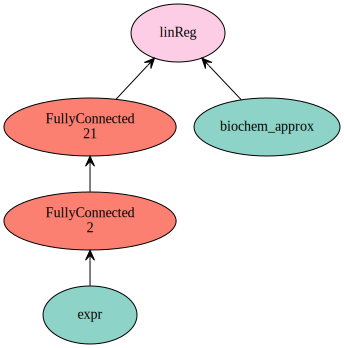

In [792]:
mx.viz.plot_network(symbol=time_model.symbol, node_attrs={"shape":"oval","fixedsize":"false"})

In [793]:
batch_size = 10
num_epoch = 10
rseed = 123

In [888]:
np.random.seed(rseed)
mx.random.seed(rseed)

time_model.bind(
    data_shapes=[('expr', (batch_size,expr.shape[0]))], 
    label_shapes=[('biochem_approx', (batch_size,biochem.shape[1]))],
    regress_label=True
)

time_model.fit(
    simIter(
        tp0, 
        tp1, 
        ['expr'], 
        [(batch_size,expr.shape[1])],
        ['biochem_approx'], 
        [(batch_size,biochem.shape[1])], 
        batch_size=batch_size,
        num_batches=num_epoch,
        coefs_multivariate=False,
        labels_multivariate=True
    ),
    optimizer_params={
        'learning_rate':0.0001, 
        'momentum': 0.9
    },
    num_epoch=num_epoch,
    eval_metric='mse'
)

TypeError: bind() got an unexpected keyword argument 'regress_label'

In [799]:
pcorr = time_model.score(
    mx.io.NDArrayIter(
        tp0,
        tp1,
        batch_size=tp0.shape[0], 
        shuffle=False
    ), 
    mx.metric.PearsonCorrelation()
)
print("Achieved {0:.3f} training PearsonCorrelation".format(pcorr[0][1]))

Achieved 0.794 training PearsonCorrelation


In [857]:
tp0s = []
tp1s = []
for genotype, genotypeGroup in dat.groupby('ORGAN'):
    for trt, treatmentGroup in genotypeGroup.groupby('COMPOUND_NAME'):
        for dose, doseGroup in treatmentGroup.groupby('DOSE'):
            doseGroup = doseGroup.sort_values('HOURS')
            tp0s.append(expr.loc[:,doseGroup.index[-2]].values)
            tp1s.append(biochem.loc[doseGroup.index[-1],:].values)
tp0s = np.array(tp0s)
tp1s = np.array(tp1s)

In [858]:
tp1s.shape

(4, 21)

In [977]:
tp0.shape

(12, 31099)

In [860]:
tp0s.shape

(4, 31099)

In [899]:
time_model.data_shapes

[DataDesc[expr,(12, 31099),<class 'numpy.float32'>,NCHW]]

In [992]:
mx.io.NDArrayIter(mx.nd.array(tp0),batch_size=4).next().data[0].shape

(4, 31099)

In [948]:
mx.io.DataBatch([mx.nd.array(tp0s)],pad=12).data[0].shape

(4, 31099)

In [946]:
time_model.predict(mx.io.DataBatch([mx.nd.array(tp0s)],pad=12).data[0])

IndexError: Slicing stop 12 exceeds limit of 4

In [ ]:
np.random.seed(rseed)
mx.random.seed(rseed)

time_model.bind(
    data_shapes=[('expr', (batch_size,expr.shape[0]))], 
    label_shapes=[('biochem_approx', (batch_size,biochem.shape[1]))]
)

time_model.fit(
    simSeqIter(
        expr.values.T, 
        biochem.values, 
        ['expr'], 
        [(batch_size,expr.shape[1])],
        ['biochem_approx'], 
        [(batch_size,biochem.shape[1])], 
        dat=dat,
        batch_size=batch_size,
        num_batches=num_epoch,
        coefs_multivariate=False,
        labels_multivariate=True
    ),
    optimizer_params={
        'learning_rate':0.0001, 
        'momentum': 0.9
    },
    num_epoch=num_epoch,
    eval_metric='mse'
)

In [690]:
pcorr = time_model.score(
    simSeqIter(
        expr.values.T, 
        biochem.values, 
        ['expr'], 
        [(batch_size,expr.shape[1])],
        ['biochem_approx'], 
        [(batch_size,biochem.shape[1])], 
        dat=dat,
        batch_size=1,
        num_batches=1,
        coefs_multivariate=False,
        labels_multivariate=True,
        coefs_only=True
    ), 
    mx.metric.PearsonCorrelation()
)
print("Achieved {0:.3f} training PearsonCorrelation".format(pcorr[0][1]))

Achieved 0.938 training PearsonCorrelation


In [662]:
doseGroup

,ORGAN,ORGAN_NO,COMPOUND_NAME,COMPOUND_NO,DOSE,SCALED.DOSE,SACRI_PERIOD,HOURS,SCALED.HOURS,PC1,PC2
combnLiver.acetaminophen.1000.3 hr,Liver,1,acetaminophen,1,1000,1.0,3 hr,3,0.125,-6.020566,14.515886
combnLiver.acetaminophen.1000.6 hr,Liver,1,acetaminophen,1,1000,1.0,6 hr,6,0.250,-14.578483,14.353093
combnLiver.acetaminophen.1000.9 hr,Liver,1,acetaminophen,1,1000,1.0,9 hr,9,0.375,-3.340911,11.373366
combnLiver.acetaminophen.1000.24 hr,Liver,1,acetaminophen,1,1000,1.0,24 hr,24,1.000,-4.078444,16.025753


In [716]:
pred_iter = simSeqIter(
        expr.values.T, 
        biochem.values, 
        ['expr'], 
        [(batch_size,expr.shape[1])],
        ['biochem_approx'], 
        [(batch_size,biochem.shape[1])], 
        dat=dat,
        batch_size=1,
        num_batches=1,
        coefs_multivariate=False,
        labels_multivariate=True,
        coefs_only=True
    )
pred_data = pred_iter.next().data[0]

In [722]:
len(pred_iter.groups)

47

In [719]:
pred_data.shape

(12, 31099)

In [721]:
time_model.predict(
    pred_data
)


[[ 3.40495646e-01 -1.15554340e-01  2.61566341e-01 -2.28681341e-01
  -2.47581291e+00 -7.70512700e-01 -1.25808835e-01 -7.39570379e-01
   1.91267288e+00 -6.16294384e-01 -1.20096433e+00 -1.26329029e+00
   5.84626645e-02 -7.91102767e-01 -8.46842676e-03 -4.85499501e-01
  -2.82128155e-01  9.12249744e-01  2.97188848e-01  1.60334325e+00
   5.57191133e-01]
 [ 3.37571591e-01 -6.91482648e-02  1.73592731e-01 -1.54449150e-01
  -1.89409482e+00 -6.53750777e-01 -1.62452936e-01 -5.52310944e-01
   1.17000997e+00 -3.83768886e-01 -8.71669531e-01 -8.76775563e-01
   6.28233850e-02 -5.74532628e-01 -4.33227569e-02 -6.13050461e-01
  -4.47475433e-01  6.46941483e-01  2.37305284e-01  9.79268730e-01
   3.83970857e-01]
 [ 3.99298131e-01 -1.57758906e-01  3.45716685e-01 -3.03080916e-01
  -3.16883230e+00 -9.52375710e-01 -1.29736409e-01 -9.49445665e-01
   2.57949829e+00 -8.25175107e-01 -1.55819666e+00 -1.65263283e+00
   6.70068488e-02 -1.02574444e+00  5.37341135e-03 -5.12315571e-01
  -2.56908953e-01  1.19055307e+00  3.

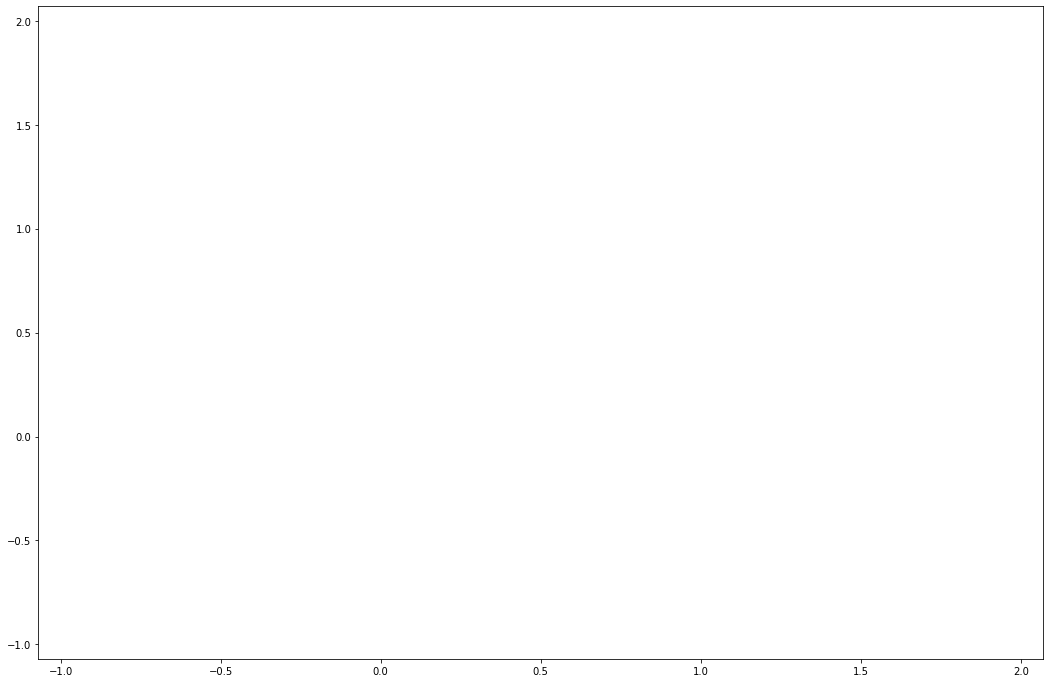

In [661]:
plt.figure(figsize=(18,12))

for genotype, genotypeGroup in dat.groupby('ORGAN'):
    for trt, treatmentGroup in genotypeGroup.groupby('COMPOUND_NAME'):
        for dose, doseGroup in treatmentGroup.groupby('DOSE'):
            doseGroup = doseGroup.sort_values('HOURS')
            plt.plot()
#plt.legend()

In [557]:
layer = mx.gluon.rnn.RNN(100, 3)
layer.initialize()
input = mx.nd.random.uniform(shape=(5, 3, 10))

In [565]:
# by default zeros are used as begin state
layer(input).shape

(5, 3, 100)

In [561]:
# manually specify begin state.
h0 = mx.nd.random.uniform(shape=(3, 3, 100))

In [570]:
layer(input, h0)[0].shape

(5, 3, 100)

In [364]:
expr_var = mx.sym.Variable('expr')

PCAin  = mx.sym.FullyConnected(data=expr_var, name='PCAin', num_hidden = 2)
PCAout  = mx.sym.FullyConnected(data=PCAin, name='PCAout', num_hidden = biochem.shape[1])

biochem_approx = mx.symbol.Variable('biochem_approx')
linReg = mx.sym.LinearRegressionOutput(data=PCAout, label=biochem_approx, name="linReg")